In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) #회귀의 경우 stratify를 안해도 되지만, 분류의 경우는 하는게 좋음

In [16]:
mms = MinMaxScaler().fit(X_train) # scaling해야 데이터 좌표가 통일되기 때문에
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [17]:
# X_train.shape # 30개의 속성

(426, 30)

In [19]:
from sklearn.decomposition import PCA

In [21]:
pca= PCA(n_components=2) # n * x(여러개의 속성) = n* 2차원(여러개의 속성을 2개로 변환하겠다!)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)

In [22]:
X_train_scaled.shape, X_train_pca.shape

((426, 30), (426, 2))

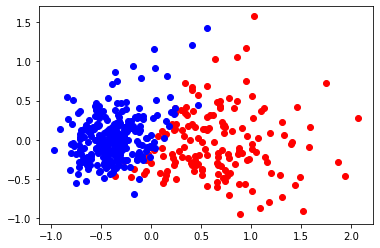

In [25]:
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], c='red') # y_train이 0인 행의 0열,1열  # 양성
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], c='blue') # 악성
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr2 = LogisticRegression().fit(X_train_scaled, y_train)
lr2.score(X_train_scaled, y_train), lr2.score(X_test_scaled, y_test)

(0.9788732394366197, 0.951048951048951)

In [30]:
lr = LogisticRegression().fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test_scaled)
lr.score(X_train_pca, y_train), lr.score(X_test_pca, y_test)
# 2차원 데이터 95%의 정확도, 30차원을 2차원으로 줄였더니 0.95의 정확도가 나왔다. 여러 변수면 좋겠지만 속성 가성비를 위해서 정제한 것 
# pca를 한다고 무조건 모델이 좋아지는것은 아님

(0.9530516431924883, 0.9370629370629371)

In [32]:
print(X_train_pca.shape)
X_train_pca[:5]

(426, 2)


array([[ 0.66500395, -0.32113687],
       [-0.63678504, -0.32547253],
       [ 1.0969527 ,  0.37235275],
       [ 0.37087045, -0.22606633],
       [ 1.2851883 , -0.44698287]])

In [36]:
print(pca.components_.shape) # 26*30 -> 30*2 -> 26*2로 만듬. 30*2를 transpose한 것
pca.components_

(2, 30)


array([[ 0.23194968,  0.08907824,  0.24110855,  0.20465441,  0.14101372,
         0.23062247,  0.29170767,  0.32387296,  0.10892321,  0.04108017,
         0.10719197, -0.01422536,  0.10620469,  0.0924732 , -0.01671651,
         0.12110957,  0.06575545,  0.12161634,  0.01768959,  0.03968212,
         0.2768518 ,  0.10635815,  0.27974594,  0.24400905,  0.11987909,
         0.20297252,  0.24723318,  0.36370312,  0.10263828,  0.09434099],
       [-0.24419612, -0.07333039, -0.22275052, -0.21142125,  0.25447343,
         0.19977954,  0.12195687, -0.00150112,  0.20345864,  0.39124684,
        -0.06113032,  0.05568053, -0.04720142, -0.07622971,  0.13203593,
         0.22087426,  0.11001004,  0.1066053 ,  0.14880575,  0.17248967,
        -0.25403824, -0.05160726, -0.22188848, -0.22801757,  0.22183708,
         0.19179005,  0.16172017,  0.05107532,  0.15317892,  0.25210365]])

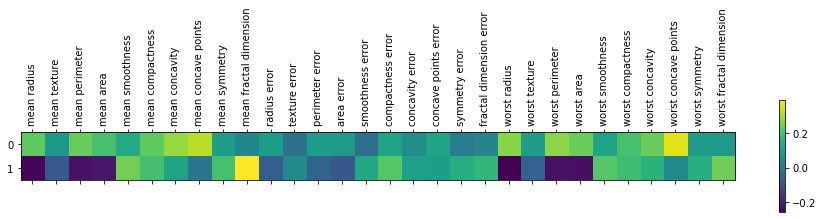

In [44]:
plt.matshow(pca.components_)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=90)
plt.show() # 첫번째 주성분은 worst fractal dimension이 매우 큰 영향. 양수인 것(왼쪽 0)이 높은 주성분(-는 높은 주성분이 되기 어려움) # 30*2를 뽑아낸 것(t(pca_components_))
#0은 첫 번째 주성분, 1은 두 번째 주성분

In [48]:
import mglearn

In [49]:
S = mglearn.datasets.make_signals()

(2000, 3)


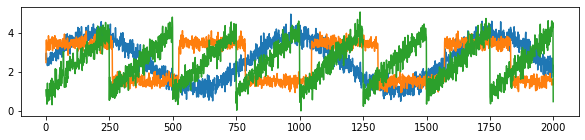

In [55]:
print(S.shape) # 2000 x 3 
plt.figure(figsize=(10, 2))
plt.plot(S, '-')
plt.show() # 총 데이터 2000개, 특성(열) 3개

In [59]:
np.random.seed(42)
A = np.random.uniform(size=(100, 3))
X = np.dot(S, A.T)

In [60]:
X.shape # 97개의 잡음이 추가됨(원래 3(음성신호)개였는데 100으로 되었으므로) # 원본에 잡음신호 섞어서 만듬

(2000, 100)

In [61]:
from sklearn.decomposition import NMF

In [66]:
nmf = NMF(n_components=3, random_state=42, max_iter=1000, tol=1e-2) # 2000 * 3 3 * 10의 3에 해당. 3 * 10은 컴퓨터가 알아서 해줌 -> 2000 * 10 # tol은 정답에 가까운 값 지정해서 넣을 수 있음, e^-2=0.01
S_ = nmf.fit_transform(X)

In [67]:
S_.shape # 근사한 값 만든 것

(2000, 3)

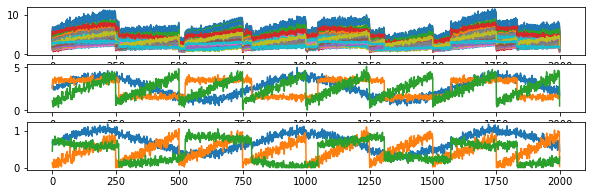

In [72]:
models = [X, S, S_] # 잡음 신호, 원본 신호, 행렬신호(잡음 섞인 신호)

fig, axes = plt.subplots(3, figsize=(10,3)) # figsize = 10x3

for model, ax in zip(models, axes):
    ax.plot(model[:, :], '-')
    
plt.show() # 잡음이 낀 신호, 원본 신호, 행렬 신호 (유사함)

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

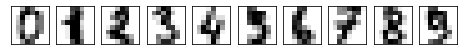

In [21]:
# print(digits['data'].shape, digits['images'].shape) # 특성 = 64, image= 8x8
# digits['target'][:10]

fix, axes = plt.subplots(1, 10, figsize=(8, 80), 
                         subplot_kw={'xticks':(), 'yticks':()}) # key, value 구조 일괄처리
for ax, img in zip(axes, digits['images']):
    ax.imshow(img, cmap='binary') #binary = 검,흰 조화
plt.show()

In [22]:
# digits['data'][:3] # 픽셀값들
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
digits_pca = PCA(n_components=2).fit_transform(digits['data']) # 2차원으로 변경, 훈련까지 시키기

In [28]:
digits_pca.shape
len(digits_pca)

1797

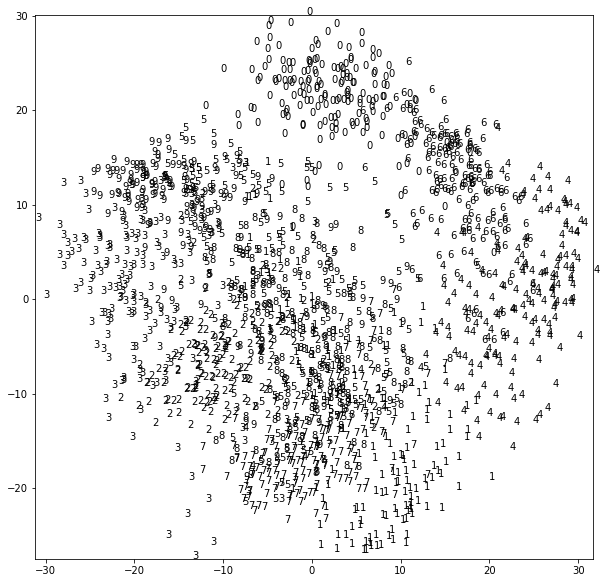

In [39]:
plt.figure(figsize=(10, 10))
# for idx in range(len(digits_pca)):
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for idx in range(len(digits_pca)):
    plt.text(digits_pca[idx, 0], digits_pca[idx,1], str(digits['target'][idx]), color='#000000')# 좌표(x,y), 출력할 데이터
plt.show()

In [40]:
#t-SNE
digits_tsne = TSNE(random_state=42).fit_transform(digits['data'])

In [41]:
digits_tsne.shape # 2차원으로 줄어든 것을 알 수 있다.

(1797, 2)

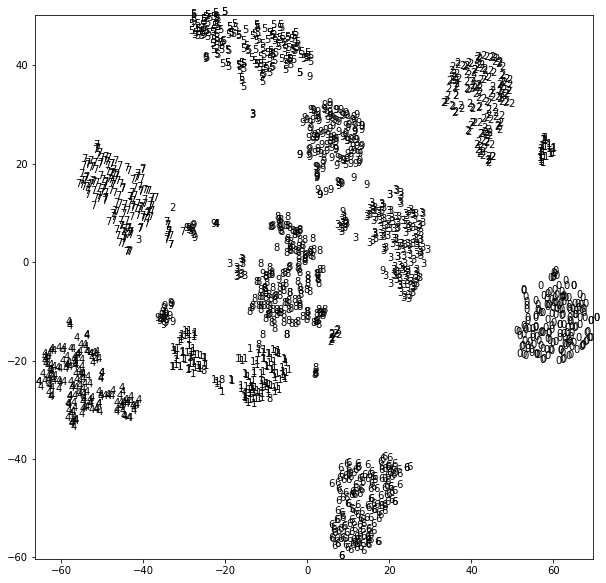

In [42]:
plt.figure(figsize=(10, 10))
# for idx in range(len(digits_pca)):
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for idx in range(len(digits_tsne)):
    plt.text(digits_tsne[idx, 0], digits_tsne[idx,1], str(digits['target'][idx]), color='#000000')# 좌표(x,y), 출력할 데이터
plt.show()

In [43]:
from sklearn.datasets import make_blobs

In [45]:
X, y = make_blobs(random_state=42)

In [48]:
X.shape, y.shape, np.unique(y) # 데이터량은 많지 않음 # y값 3개의 분류를 가지고 있음

((100, 2), (100,), array([0, 1, 2]))

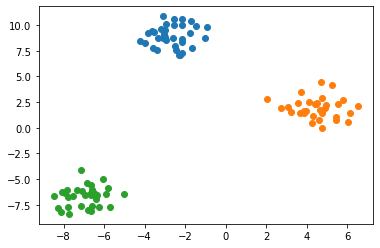

In [51]:
for t in np.unique(y):
    plt.scatter(X[y==t, 0], X[y==t, 1])

plt.show() # y값 0,1,2를 군집화함

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(n_clusters=3) # 3개로 나누기
kmeans.fit(X) # 비지도 학습이므로 fit할 때 y를 주지 않음

KMeans(n_clusters=3)

In [57]:
print(kmeans.labels_) # 훈련데이터가 어떻게 레이블 됐는지
print(kmeans.predict(X)) # 같은데이터로 훈련하고 예측하므로 같은값이 나옴
print(kmeans.cluster_centers_) # 새로운 데이터는 center(중심포인트)를 기준으로 가까운 곳에 grouping # 2차원의 세 점의 중심좌표

[0 2 1 2 0 2 1 2 2 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 2 0 0 0 0 2 2 0 1 1 1
 1 2 2 0 1 2 1 1 2 0 0 0 2 2 2 1 0 0 0 1 1 2 1 0 2 0 2 0 0 2 0 2 2 2 0 0 1
 2 0 2 0 2 2 1 2 1 0 1 1 1 2 1 2 2 2 1 2 1 1 1 2 0 1]
[0 2 1 2 0 2 1 2 2 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 2 0 0 0 0 2 2 0 1 1 1
 1 2 2 0 1 2 1 1 2 0 0 0 2 2 2 1 0 0 0 1 1 2 1 0 2 0 2 0 0 2 0 2 2 2 0 0 1
 2 0 2 0 2 2 1 2 1 0 1 1 1 2 1 2 2 2 1 2 1 1 1 2 0 1]
[[-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]
 [ 4.49951001  1.93892013]]


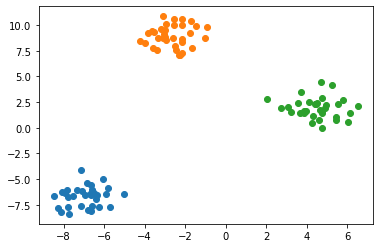

In [58]:
y_pred = kmeans.predict(X)
for t in np.unique(y_pred):
    plt.scatter(X[y_pred==t, 0], X[y_pred==t, 1])

plt.show()

In [59]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [60]:
kmeans.cluster_centers_

array([[ 3.86755362,  2.44066237],
       [-6.95170962, -6.67621669],
       [-2.72550354,  8.12321323],
       [ 5.17096366,  1.40581899],
       [-2.60289185,  9.84987659]])

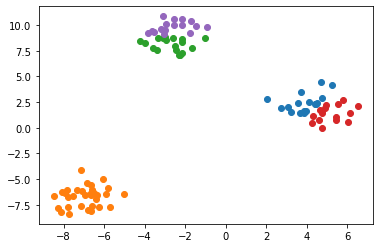

In [61]:
y_pred = kmeans.predict(X)
for t in np.unique(y_pred):
    plt.scatter(X[y_pred==t, 0], X[y_pred==t, 1])

plt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering

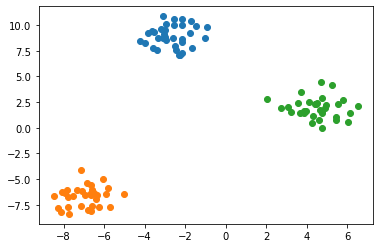

In [63]:
agg = AgglomerativeClustering(n_clusters=3) # 계속 병합하다가 어느 순간 멈춰라! 클러스터 수 안주면 계속 병합
y_pred = agg.fit_predict(X)

for t in np.unique(y_pred):
    plt.scatter(X[y_pred==t, 0], X[y_pred==t, 1])

plt.show()

In [64]:
from sklearn.cluster import DBSCAN

In [78]:
dbscan = DBSCAN(eps=1.5, min_samples=3) # eps : 거리
y_pred = dbscan.fit_predict(X)

np.unique(y_pred)

array([0, 1, 2], dtype=int64)

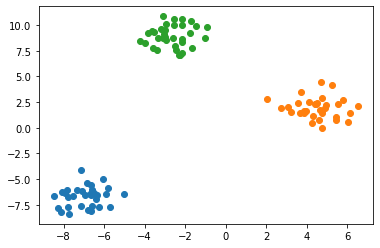

In [79]:
for t in np.unique(y_pred):
    plt.scatter(X[y_pred==t, 0], X[y_pred==t, 1])

plt.show()